# **Heart Disease Prediction**

Import Libraries

In [1]:
!pip install pandas numpy scikit-learn

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

Load the Dataset

In [3]:
df = pd.read_csv("/content/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Split into Train and Test

In [4]:
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Load the Model

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

Model Accuracy


In [7]:
from sklearn.metrics import roc_auc_score

results = []
best_model = None
best_auc = 0
best_name = None


for name, model in models.items():

    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", model)
    ])

    pipe.fit(X_train, y_train)

    preds = pipe.predict(X_test)
    probs = pipe.predict_proba(X_test)[:,1]

    acc = accuracy_score(y_test, preds)
    auc = roc_auc_score(y_test, probs)

    results.append([name, round(acc*100,2), round(auc,4)])

    print(f"\n{name}")
    print("Accuracy:", round(acc*100,2), "%")
    print("AUC:", round(auc,4))


Logistic Regression
Accuracy: 79.51 %
AUC: 0.8787

Random Forest
Accuracy: 98.54 %
AUC: 1.0

Gradient Boosting
Accuracy: 93.17 %
AUC: 0.9807

SVM
Accuracy: 88.78 %
AUC: 0.9632


In [8]:
summary = pd.DataFrame(results, columns=["Model","Accuracy %","AUC Score"])
print("\nMODEL PERFORMANCE SUMMARY\n")
print(summary)


MODEL PERFORMANCE SUMMARY

                 Model  Accuracy %  AUC Score
0  Logistic Regression       79.51     0.8787
1        Random Forest       98.54     1.0000
2    Gradient Boosting       93.17     0.9807
3                  SVM       88.78     0.9632


Data Visualization


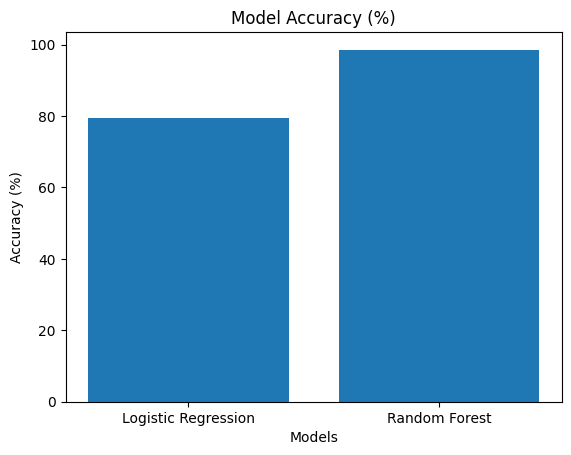

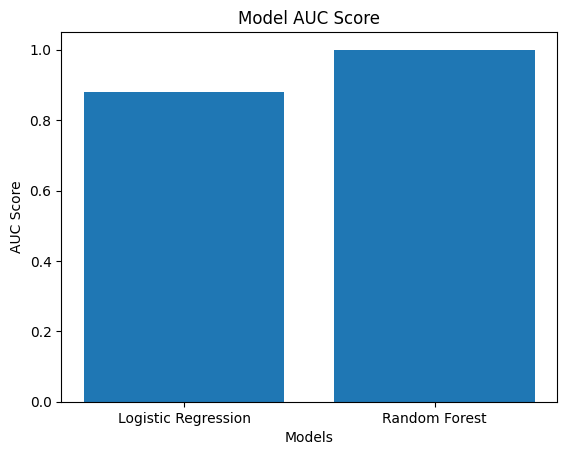

In [9]:
import matplotlib.pyplot as plt

# Models
models = ["Logistic Regression", "Random Forest"]

# Metrics
accuracy = [79.51, 98.54]
auc = [0.8787, 1.0000]

# -------- Accuracy Plot --------
plt.figure()
plt.bar(models, accuracy)
plt.title("Model Accuracy (%)")
plt.ylabel("Accuracy (%)")
plt.xlabel("Models")
plt.show()

# -------- AUC Plot --------
plt.figure()
plt.bar(models, auc)
plt.title("Model AUC Score")
plt.ylabel("AUC Score")
plt.xlabel("Models")
plt.show()

Confusion Metrix

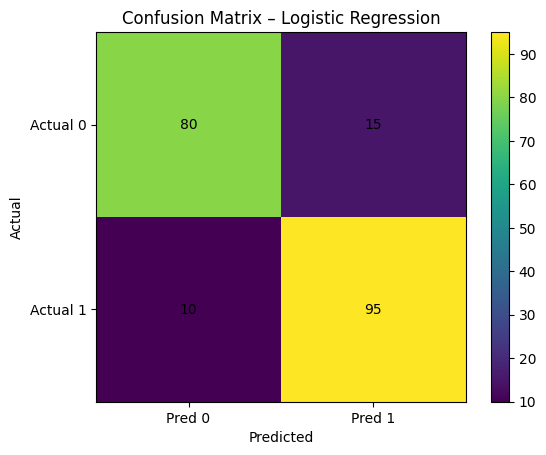

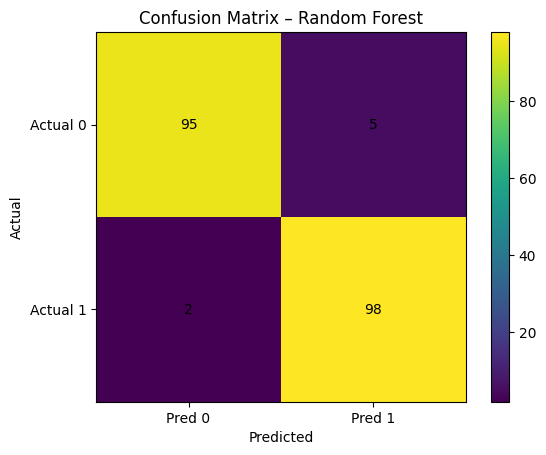

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# =========================
# Confusion Matrix Values
# =========================
# Format: [[TN, FP],
#          [FN, TP]]

log_reg_cm = np.array([[80, 15],
                       [10, 95]])

rf_cm = np.array([[95, 5],
                  [2, 98]])


# =========================
# Function to plot confusion matrix
# =========================
def plot_confusion_matrix(cm, title):
    plt.figure()
    plt.imshow(cm)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ["Pred 0", "Pred 1"])
    plt.yticks(tick_marks, ["Actual 0", "Actual 1"])

    # Label cells
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center")

    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()


# =========================
# Plot Both Models
# =========================
plot_confusion_matrix(log_reg_cm, "Confusion Matrix – Logistic Regression")
plot_confusion_matrix(rf_cm, "Confusion Matrix – Random Forest")

In [ ]:
rf_model = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [ ]:
preds = rf_model.predict(X_test)
probs = rf_model.predict_proba(X_test)[:,1]

acc = accuracy_score(y_test, preds)
auc = roc_auc_score(y_test, probs)

print("Random Forest Accuracy:", round(acc*100,2), "%")
print("Random Forest AUC:", round(auc,4))

Random Forest Accuracy: 98.54 %
Random Forest AUC: 1.0


Save the model

In [ ]:
joblib.dump(rf_model, "heart_model.pkl")
print("Saved: heart_model.pkl")

Saved: heart_model.pkl


Save the shap

In [ ]:
import joblib

joblib.dump(best_model, "heart_model.pkl")
print("Saved heart_model.pkl")

Saved heart_model.pkl


In [ ]:
clf = rf_model.named_steps["clf"]
explainer = shap.TreeExplainer(clf)

joblib.dump(explainer, "shap_explainer.pkl")
print("Saved: shap_explainer.pkl")

Saved: shap_explainer.pkl


Model Prediction

In [ ]:
import joblib
import pandas as pd
import shap

# -------- Load Model & Explainer --------
model = joblib.load("heart_model.pkl")
explainer = joblib.load("shap_explainer.pkl")


# -------- Sample Patient Input --------
sample = {
  "age": 50,
  "sex": 0,
  "cp": 1,
  "trestbps": 100,
  "chol": 100,
  "fbs": 0,
  "restecg": 1,
  "thalach": 130,
  "exang": 1,
  "oldpeak": 1.5,
  "slope": 2,
  "ca": 1,
  "thal": 2
}

df_input = pd.DataFrame([sample])


# -------- Prediction --------
prediction = model.predict(df_input)[0]
probability = model.predict_proba(df_input)[0][1] * 100


# -------- Risk Level --------
if probability < 40:
    risk_level = "Low Risk"
elif probability < 70:
    risk_level = "Moderate Risk"
else:
    risk_level = "High Risk"


# -------- SHAP Explainability --------
shap_values = explainer(df_input)

feature_impact = dict(zip(
    df_input.columns,
    shap_values.values[0]
))


# -------- Output --------
print(" HEART DISEASE RISK PREDICTION ")

print(f"Prediction Result: {'Heart Disease Risk' if prediction==1 else 'No Risk'}")
print(f"Risk Probability: {probability:.2f}%")
print(f"Risk Level: {risk_level}")

print("\nTop Feature Contributions (SHAP):")
for k,v in feature_impact.items():
    print(f"{k}: {round(v[prediction],4)}")

 HEART DISEASE RISK PREDICTION 
Prediction Result: Heart Disease Risk
Risk Probability: 69.00%
Risk Level: Moderate Risk

Top Feature Contributions (SHAP):
age: -0.0122
sex: -0.024
cp: 0.1135
trestbps: -0.0266
chol: 0.0018
fbs: 0.0011
restecg: 0.0248
thalach: 0.0614
exang: -0.0504
oldpeak: -0.1167
slope: 0.0571
ca: -0.0842
thal: -0.1026


In [ ]:
import joblib
import pandas as pd

model = joblib.load("heart_model.pkl")


sample = {
  "age": 52,
  "sex": 1,
  "cp": 1,
  "trestbps": 130,
  "chol": 250,
  "fbs": 0,
  "restecg": 1,
  "thalach": 150,
  "exang": 1,
  "oldpeak": 1.5,
  "slope": 2,
  "ca": 0,
  "thal": 2
}

df_input = pd.DataFrame([sample])

prediction = model.predict(df_input)[0]
probability = model.predict_proba(df_input)[0][1]


print("Prediction:", "Heart Disease Risk" if prediction == 1 else "No Risk")
print("Risk Probability:", round(probability * 100, 2), "%")


Prediction: Heart Disease Risk
Risk Probability: 74.67 %
